
**1.importing necessary libraries**

In [1]:
# Install xgboost (if not already installed)
!pip install xgboost

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE  # stands for synthetic minority oversampling technique
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#for bold -->** 
#to edit mardwon click once on the cell+press enter 
#edit markdwon oce runned ====double click
#to add line above click esc + a

In [2]:
df = pd.read_csv(r"C:\Users\Muskan\OneDrive\customer chrun project\WA_Fn-UseC_-Telco-Customer-Churn - Copy.csv")


**2.inspecting the data**

In [3]:
df.shape

(7043, 21)

In [4]:
#some columns wont be visible sometimes it just truncates so to avoid this 
pd.set_option("display.max_columns",None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#understanding data tenure means how many month the customer was in tht services  
#binning can be used to group to data like 1-12 months customer in one bin and others in one bin 
#through binning we can make tenure into categorical data

In [6]:
df.info()
#show missing values,datatype in columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# from the above we can understand tht there is no missing values 
#and total charges must be float or int but it is object(convert into float)(has missing which is not shown) i.e (string)
#customer id is not so we must drop it

dropping customer id column as this is nt required for modelling


In [8]:
df=df.drop(columns=["customerID"])

In [9]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [10]:
df.columns #print columns
print(df['gender'].unique())

['Female' 'Male']


In [11]:
#printing unique values in all all columns
#to basically check categorical or numerical columns
numerical_features=['tenure','MonthlyCharges','TotalCharges']
for col in df.columns:
    if col not in numerical_features:
           print(col,df[col].unique())
           print("--"*50)
#here we are only printing categorical features

gender ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen [0 1]
----------------------------------------------------------------------------------------------------
Partner ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Dependents ['No' 'Yes']
----------------------------------------------------------------------------------------------------
PhoneService ['No' 'Yes']
----------------------------------------------------------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
----------------------------------------------------------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------

In [12]:
#to check the missing values
df.isnull().sum() 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
#changing the data type from string to int
#df["TotalCharges"]=df["TotalCharges"].astype(float)
# error could not convert string to float: ' '   (which means '' are used instead of missing value

In [14]:
df[df['TotalCharges']==" "]
#after executing when we can see totalcharge are empty 
#if we look at the tables or coulmns like totalcharge is empty becuase tenure is 0 so obviously it is empty

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
len(df[df['TotalCharges']==" "])

11

In [16]:
#we are replacing the empty space which is "  " with 0.0 as string because other rows are string only
df['TotalCharges']=df['TotalCharges'].replace({" " : "0.0"})

In [17]:
len(df[df['TotalCharges']==" "])

0

In [18]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [19]:
#now datatype for total charges are float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#checking the class distribution of target column

In [20]:
#checking the class distribution of target column
print(df['Churn'].value_counts())
#.value_counts():This is a pandas Series method that counts how many times each unique value appears in that column.

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**INSIGHTS:**

1.REMOVED customer id from dataset as it is not required for modelling  
2.No missing values in dataset  
3.Missing values in TotalCharges column were replaced with 0  
4.Class imbalance identified  


**3.Exploratory Data Analysis**

In [21]:
df.shape

(7043, 20)

In [22]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [24]:
#giving statistics **only for numerical datatypes**
df.describe()
#used to check outliers and data correctness

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numerical features-Analysis**

Understanding the distribution of numerical features

In [25]:
def plot_histogram(df,column_name):
    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name],kde=True)
    #kde is the curve tht makes the understanding very easy
    plt.title(f"Distribution of {column_name}")
    #calculate mean and mediun values for the columns
    col_mean=df[column_name].mean()
    col_median=df[column_name].median()
    #add vertical lines for mean  and median
    plt.axvline(col_mean,color="red",linestyle="--",label="Mean")
    plt.axvline(col_median,color="green",linestyle="-",label="Median")
    plt.legend()
    plt.show()
    

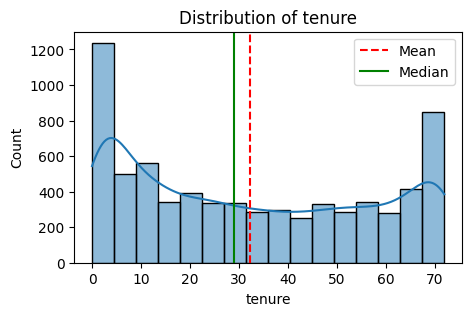

In [26]:
plot_histogram(df,'tenure') 

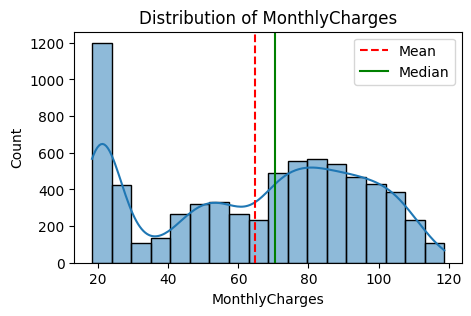

In [27]:
plot_histogram(df,'MonthlyCharges') 

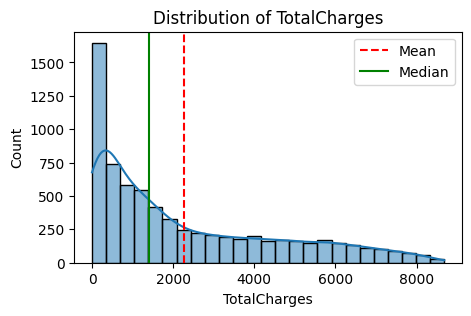

In [28]:
plot_histogram(df,'TotalCharges') 

since we are using random forest we dont need to treat the above outliers

In [29]:
#here outliers are detected in distribution of total charges but it is not good to model with outliers for the 
#models like linear regression,logistic regression so on (so we can perform outliers correction like using model which are less sensitive to outliers,
#standardiation,log transformation,removal,trearting outliers seperately )


Box plot for numerical features(detecting outliers)

In [30]:
def plot_boxplot(df,column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f"distribution of {column_name}")
    plt.ylabel(column_name)
    plt.show()

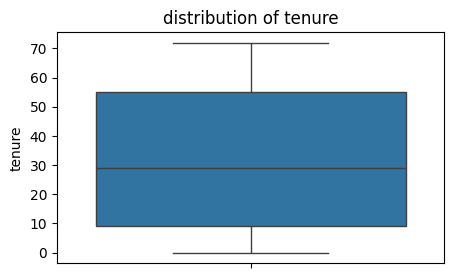

In [31]:
plot_boxplot(df,'tenure') 

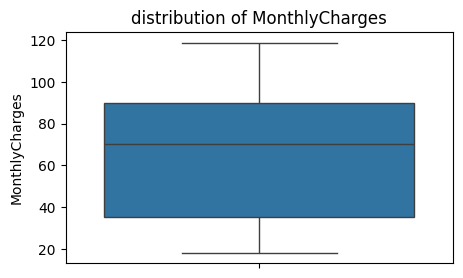

In [32]:
plot_boxplot(df,'MonthlyCharges') 

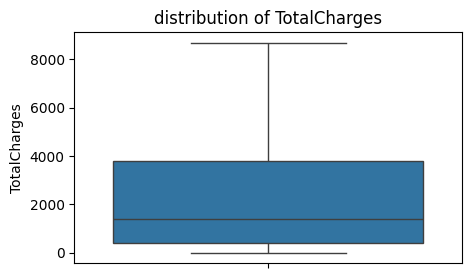

In [33]:
plot_boxplot(df,'TotalCharges') 

**correaltion heatmap fot numerical columns**

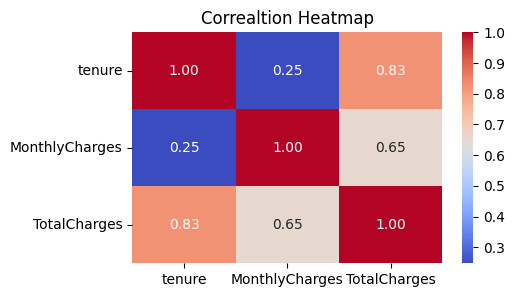

In [34]:
plt.figure(figsize=(5,3))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correaltion Heatmap")
plt.show()
#ignore 1 as it is tenure tenure ,mothly annd montly
# Why is high correlation bad in modeling?
#1️⃣ Multicollinearity 
#2.Overfitting risk

In [35]:
#we are not dropping one feature because obviously if tenure is incresing it will definetely increase totalcharges
#we can first see if the model is not performing good we can drop the features


**Categorical features analysis**

In [36]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Countplot for categorical columns**

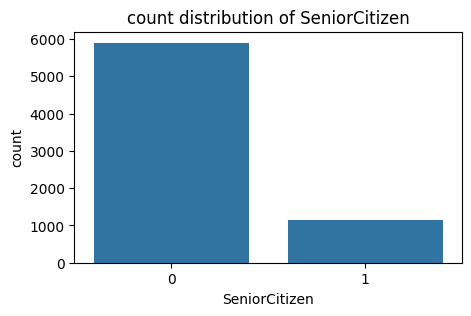

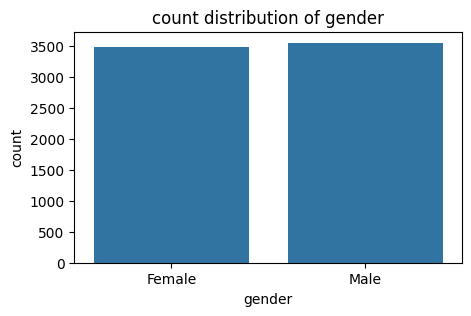

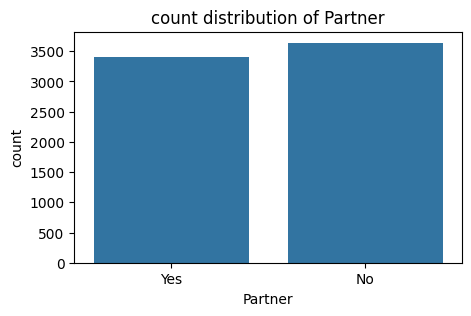

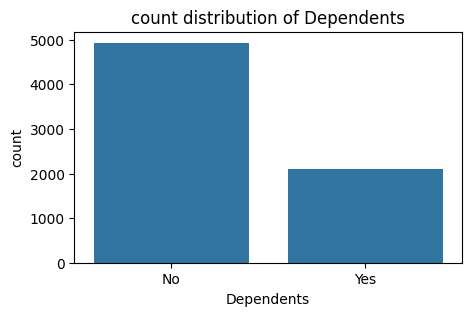

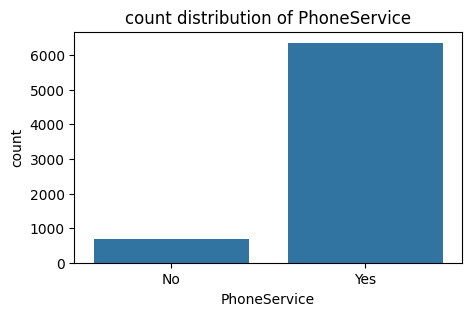

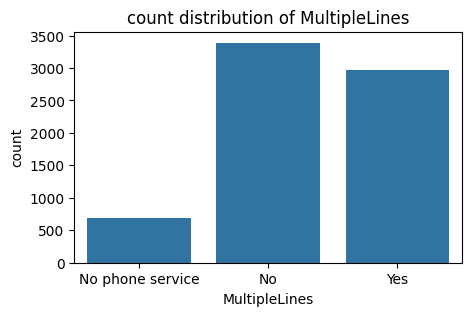

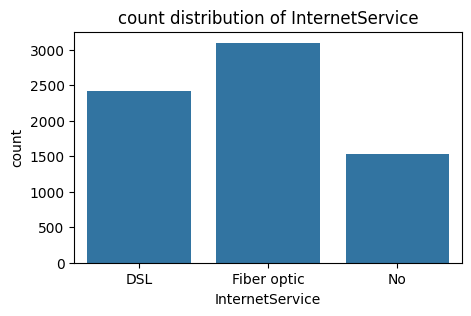

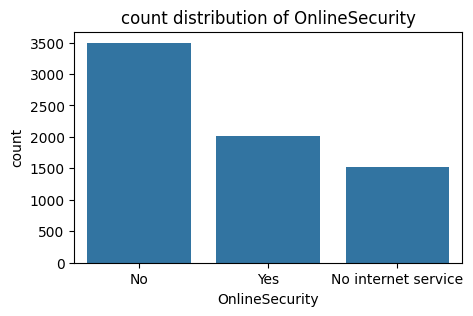

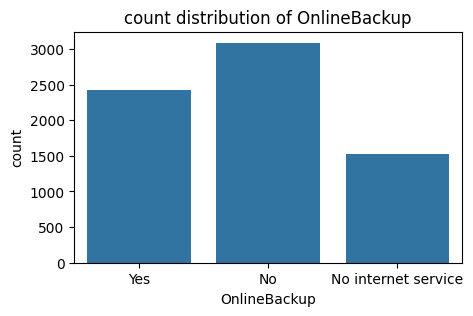

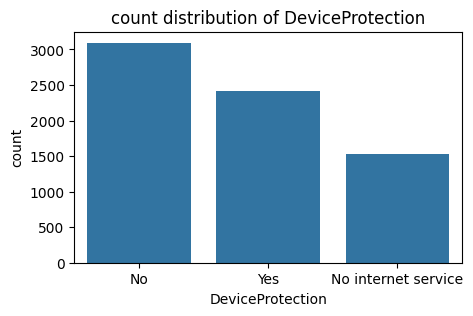

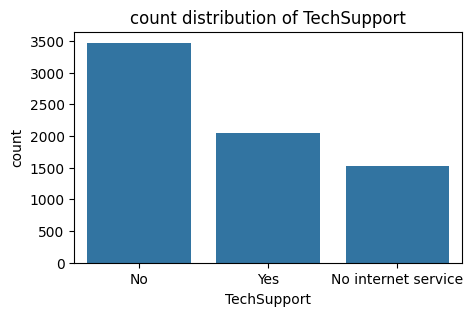

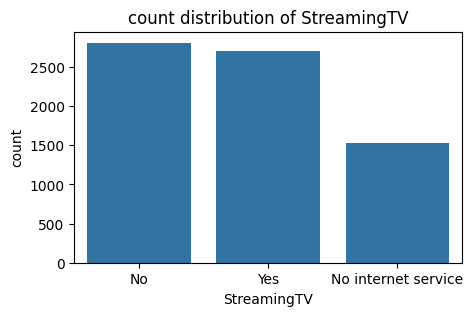

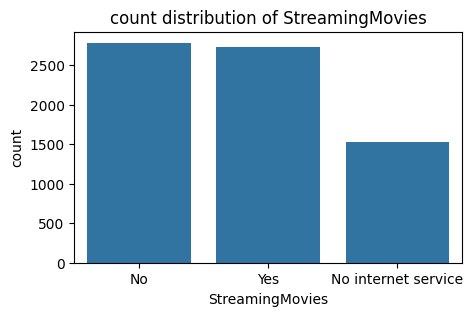

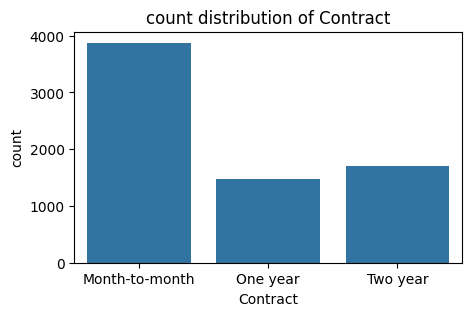

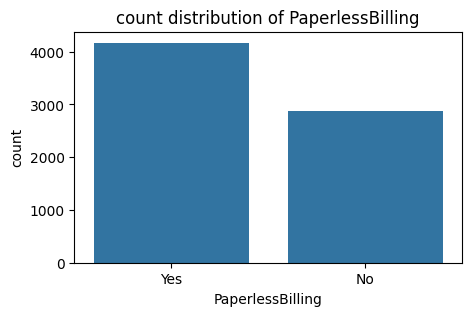

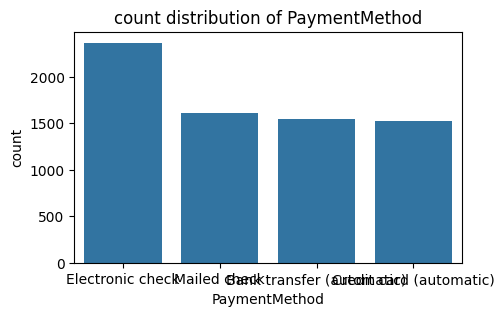

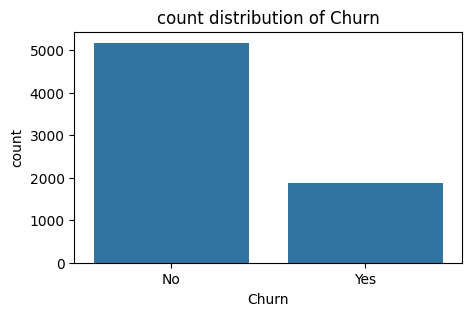

In [38]:
#to check how the data is distributed we can use countplot
#object col are nothing but numerical columns
object_col=df.select_dtypes(include="object").columns.to_list()
object_col=["SeniorCitizen"]+object_col
object_col
for col in object_col:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"count distribution of {col}")
    plt.show()

In [39]:
#the thing we observed is tht,the classes are not distributed evenly in this case it may not effected beacuse it is random forest
#but we can aslse see the classs imbalance in the target or final prediction churn or not churn which is effected by all models even in random forest


**4.Data preprocessing**

In [40]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Label encoding of target columns

In [41]:
df['Churn']=df['Churn'].replace({"yes" :1,"no":0})
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Label Encoding of categorical features

In [42]:
#identifying columns with object data type
object_columns=df.select_dtypes(include='object').columns.to_list()
print(object_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [43]:
#initislize a dictionary to save the encoders(this is done to encode the new unseen data points as well)
import pickle
if 'Churn' in object_columns:
    object_columns.remove('Churn')

encoders={}
#apply label encoding and store the encoders
for column in object_columns:
    label_encoder=LabelEncoder()
    df[column]=label_encoder.fit_transform(df[column])
    #print(df[column]) ---the data is transformed here sucessfully
    
    encoders[column]=label_encoder#You save the fitted encoder in your encoders dictionary.
   
with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f)
#open a file named encoders.pkl in write-binary mode ("wb").
# f is just the variable name for the file object.
#pickle.dump(encoders, f)
#This line saves the encoders dictionary into the file

In [44]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [45]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


**train and test data split**

In [46]:
#splittling the features and target
x=df.drop('Churn',axis=1)## Drop the column by its name, not its values
y=df['Churn']

In [47]:
#if other models like logisticRegression is used then apply standard scaler for three featurs which totalcharges,monthlycharges and tenure
#from sklearn.preprocesssing import StandardScaler
from sklearn.preprocessing import StandardScaler
import pickle

# Dictionary to store each column's scaler
sencoders = {}

# List of columns to scale
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to numeric, invalid strings become NaN

# Drop rows with NaN values in these columns (optional: you can also fill them)
df.dropna(subset=columns_to_scale, inplace=True)

# Apply StandardScaler to each column
for col in columns_to_scale:
    standardization = StandardScaler()
    df[[col]] = standardization.fit_transform(df[[col]])  # Must be 2D
    sencoders[col] = standardization  # Store scaler for this column

# Save all scalers to a file
with open("sencoders.pkl", "wb") as f:
    pickle.dump(sencoders, f)


    


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
#checking the imabalance data distribution in target 
print(y_train.value_counts())

Churn
No     4138
Yes    1496
Name: count, dtype: int64


SMOTE--->Synthetic Minority Over Sampling Technique

In [50]:
smote=SMOTE(random_state=42)

In [51]:
#we are performing smote only on tranning data 
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [52]:
print(y_train_smote.shape)

(8276,)


In [53]:
print(y_train_smote.value_counts())

Churn
No     4138
Yes    4138
Name: count, dtype: int64


**5.Model Training**

In [54]:
#traning and testing with cross validation

In [55]:
models={
    "Decision tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
     "XGBoost":XGBRFClassifier(random_state=42),
}
from sklearn.preprocessing import LabelEncoder

# Encode 'Yes'/'No' to 1/0
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Then apply SMOTE to the encoded labels
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train_encoded)


In [56]:
#dictionary to store cross val score
cv_scores={}
#perform 5 fold cross validation
for model_name,model in models.items():
    print(f"trainning {model_name} with default parameters....")
    scores=cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring='accuracy')
    cv_scores[model_name]=scores #key values pairs saves the answer
    print(f"{model_name} Cross validation accuracy :{np.mean(scores):.2f}")
    print("-"*50)
    
    

trainning Decision tree with default parameters....
Decision tree Cross validation accuracy :0.78
--------------------------------------------------
trainning Random Forest with default parameters....
Random Forest Cross validation accuracy :0.84
--------------------------------------------------
trainning XGBoost with default parameters....
XGBoost Cross validation accuracy :0.81
--------------------------------------------------


In [57]:
cv_scores

{'Decision tree': array([0.6781401 , 0.72567976, 0.82477341, 0.83806647, 0.84229607]),
 'Random Forest': array([0.73128019, 0.77039275, 0.90694864, 0.90271903, 0.89365559]),
 'XGBoost': array([0.73309179, 0.77039275, 0.85981873, 0.83987915, 0.85558912])}

**Model selection with hyperparameter tuning**

In [58]:
#initializaing models
Decision_tree=DecisionTreeClassifier(random_state=42)
Random_Forest=RandomForestClassifier(random_state=42)
XGBoost_classifier=XGBRFClassifier(random_state=42)

In [59]:
#hyperparamter grids randomized search cv
#dt stands for decision tree
param_grid_dt={
    "criterion":["gini","entropy"],
    "max_depth":[None,10,20,30,50,70],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}
param_grid_rf={
    "n_estimators":[50,100,200,500],
    "max_depth":[None,10,20,30,50,70],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap":[True,False]
}
param_grid_xgb={
    "n_estimators":[50,100,200,500],
    "max_depth":[3,5,7,10],
    "learning_rate":[0.01,0.1,0.2,0.3],
    "subsample":[0.5,0.7,1.0],
    "colsample_bytree":[0.5,0.7,1.0]
}

    

In [60]:
#hyperparamter tuning for 3 tree based models
#the below steps can be automated by using for loopo or using pipeline 
#perform RandomSearchCv for each model
from sklearn.preprocessing import LabelEncoder

# Encode 'Yes'/'No' to 1/0
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Then apply SMOTE to the encoded labels
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train_encoded)

from sklearn.model_selection import RandomizedSearchCV
random_search_dt = RandomizedSearchCV(estimator=Decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)

random_search_rf = RandomizedSearchCV(estimator=Random_Forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=XGBoost_classifier, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)

In [61]:
#fit the models
#random_search_dt.fit(x_train_smote, y_train_smote)
random_search_rf.fit(x_train_smote, y_train_smote)
#random_search_xgb.fit(x_train_smote, y_train_smote)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 50, 70],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [62]:

#print(random_search_dt.best_estimator_)
#print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

#print(random_search_xgb.best_estimator_)
#print(random_search_xgb.best_score_)

RandomForestClassifier(bootstrap=False, max_depth=70, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)
0.8409992410642614


In [63]:
#Get the model with best score
best_model=None
best_score=0
#if random_search_dt.best_score_>best_score:
    #best_model=random_search_dt.best_estimator_
    #best_score=random_search_dt.best_score_
    
if random_search_rf.best_score_ >best_score:
    best_model=random_search_rf.best_estimator_
    best_score=random_search_rf.best_score_
    
#if random_search_xgb.best_score_ >best_score:
    #best_model=random_search_xgb.best_estimator_
    #best_score=random_search_xgb.best_score_

In [64]:
print(f"Best model:{best_model}")
print(f"Best cross-validation Accuracy:{best_score}")

Best model:RandomForestClassifier(bootstrap=False, max_depth=70, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)
Best cross-validation Accuracy:0.8409992410642614


**Since random forest is best model so we are tranning the data on Random forest**

In [65]:
print(f"Best model:{best_model}")
print(f"Best cross-validation Accuracy:{best_score}")

Best model:RandomForestClassifier(bootstrap=False, max_depth=70, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)
Best cross-validation Accuracy:0.8409992410642614



**Model Evalaution**

In [66]:
print(y_test.value_counts())

Churn
No     1036
Yes     373
Name: count, dtype: int64


In [67]:

#evalaute on test data
#y_pred=best_model.predict(x_test)
#print(best_model)
#print("accuracy",accuracy_score(y_test,y_pred))#since the data is imbalace in test data we should ignore accuracy
#print("confusion matirx:",confusion_matrix(y_test,y_pred))
#print("classification report:",classification_report(y_test,y_pred))

In [68]:
#with open("best_model.pkl","wb") as f:
    #pickle.dump(best_model,f)
    



**7.Load the save model and build the predictive system**

In [69]:
model_data = {
    "model": best_model,
    "feature_names": x.columns.to_list(),
    "feature_importances": best_model.feature_importances_  # <-- Remove this
}

with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)



In [84]:
import pandas as pd
import pickle

# Sample input
input_data = {
    
  
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 68,
    'PhoneService': 'Yes',
    'MultipleLines': 'Yes',
    'InternetService': 'DSL',
    'OnlineSecurity': 'Yes',
    'OnlineBackup': 'No',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'No',
    'PaymentMethod': 'Mailed check',
    'MonthlyCharges': 54.45,
    'TotalCharges': 3687.75
}



# Load model and metadata
with open("customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)
    model = model_data["model"]
    feature_names = model_data["feature_names"]
    feature_importances = model_data["feature_importances"]

# Convert input_data to DataFrame
df = pd.DataFrame([input_data])

# Replace "No internet service" → "No" to match Flask
replace_cols = [
    'InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in replace_cols:
    if col in df.columns:
        df[col] = df[col].replace("No internet service", "No")

# Load encoders
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# Apply encoding
for col in df.columns:
    if col in encoders:
        try:
            df[col] = encoders[col].transform(df[col])
        except ValueError:
            # Handle unseen labels gracefully
            known_classes = encoders[col].classes_
            df[col] = df[col].apply(lambda x: x if x in known_classes else known_classes[0])
            df[col] = encoders[col].transform(df[col])


# Make prediction
prediction = model.predict(df)[0]
proba = model.predict_proba(df)[0]

no_churn_prob = round(proba[0] * 100, 2)
churn_prob = round(proba[1] * 100, 2)

print("\nPrediction:", "Churn" if prediction == 1 else "No Churn")
print(f"No Churn: {no_churn_prob}% | Churn: {churn_prob}%")



Prediction: No Churn
No Churn: 97.02% | Churn: 2.98%
